# 6.5 Unsupervised Machine Learning - Clustering

### Content List:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

#Remove scientific notation
pd.options.display.float_format='{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
#Create data path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A6\24-03-2024 TransferMarkt'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'big5_player_list.csv'), index_col=False)

In [5]:
df.shape

(2431, 8)

In [6]:
df.head()

,Unnamed: 0,unique_id,player_name,age,country_of_citizenship,current_club_country,market_value_in_eur,highest_market_value_in_eur
0,0,0,Henrikh Mkhitaryan,35,Armenia,Italy,6000000,37000000
1,2,1,Lukas Hradecky,34,Finland,Germany,2500000,12000000
2,3,2,Frederik Rönnow,31,Denmark,Germany,5500000,5500000
3,4,3,Thomas Foket,29,Belgium,France,7000000,7000000
4,10,4,Rémy Cabella,34,France,France,4000000,14000000


In [7]:
#Delete columns not necessary for anaysis
big5_df = df.drop (columns = [ 'Unnamed: 0','unique_id','player_name','country_of_citizenship','current_club_country'])

In [8]:
big5_df.columns

Index(['age', 'market_value_in_eur', 'highest_market_value_in_eur'], dtype='object')

In [9]:
big5_df.head()

,age,market_value_in_eur,highest_market_value_in_eur
0,35,6000000,37000000
1,34,2500000,12000000
2,31,5500000,5500000
3,29,7000000,7000000
4,34,4000000,14000000


### 2. The elbow technique

In [10]:
num_cl = range(1, 11) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(big5_df).score(big5_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[-1.9397835601445379e+18,
 -7.996054594216255e+17,
 -4.9161092307714566e+17,
 -3.618373707951689e+17,
 -2.8921394945498566e+17,
 -2.3703458334500246e+17,
 -1.9650861188225776e+17,
 -1.6821916166450333e+17,
 -1.4306051427773058e+17,
 -1.247212226079446e+17]

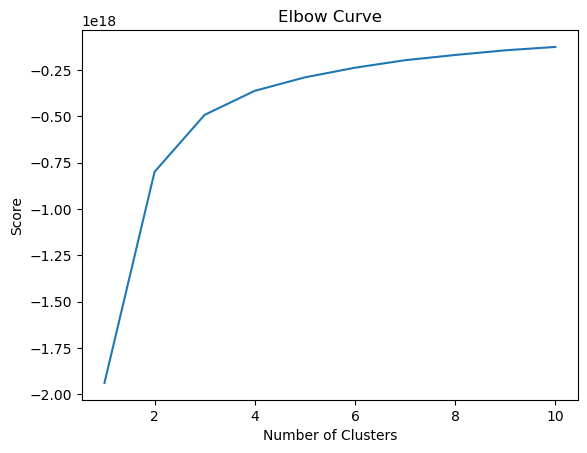

In [12]:
# Plot the elbow curve using PyLab.
num_cl = range(1, 11)  # Adjust the range to include 10 clusters
pl.plot(num_cl, score[:10])  # Use only the first 10 elements of score
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for my cluster is three because the curve starts to strighen out ater three

### 3. k-means clustering

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init=10) 

In [14]:
kmeans.fit(big5_df)

KMeans(n_clusters=3, n_init=10)

In [15]:
big5_df['clusters'] = kmeans.fit_predict(big5_df)

In [16]:
big5_df.head()

,age,market_value_in_eur,highest_market_value_in_eur,clusters
0,35,6000000,37000000,2
1,34,2500000,12000000,0
2,31,5500000,5500000,0
3,29,7000000,7000000,0
4,34,4000000,14000000,0


In [17]:
big5_df['clusters'].value_counts()

clusters
0    1846
2     485
1     100
Name: count, dtype: int64

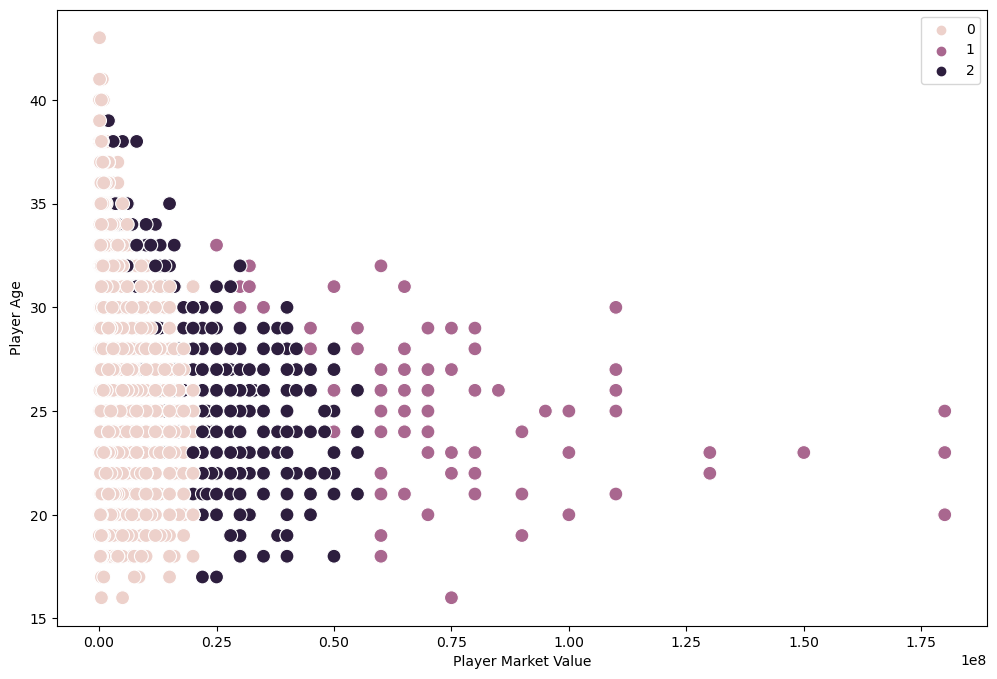

In [18]:
# Plot the clusters for the 'Player Market Value' and 'Player Age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['market_value_in_eur'], y=df['age'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Market Value')
plt.ylabel('Player Age')
plt.show()

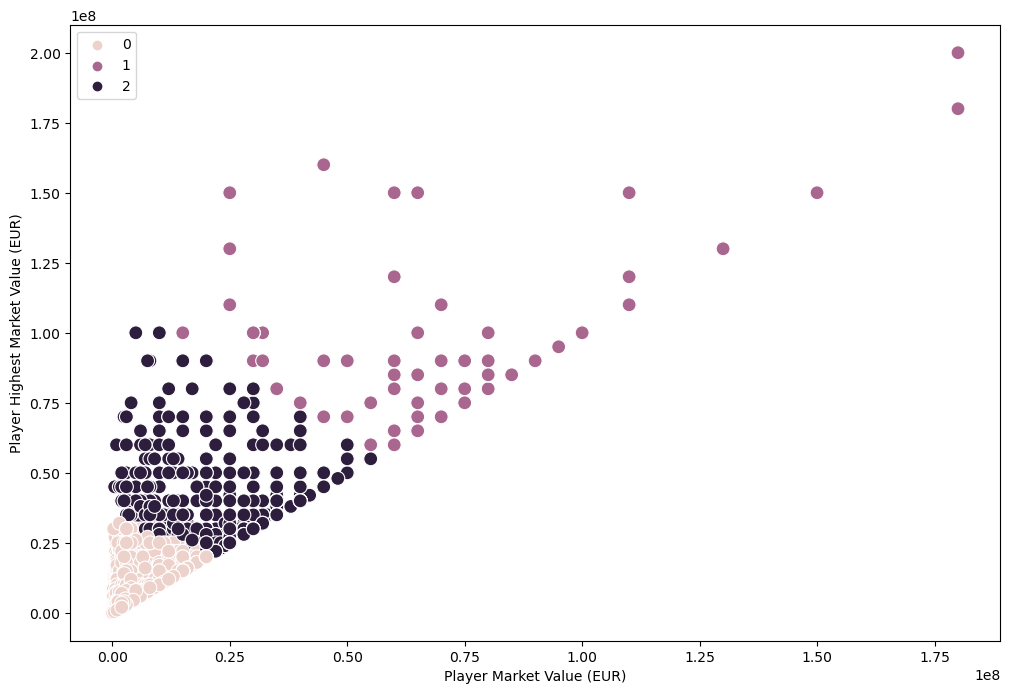

In [19]:
# Plot the clusters for the 'Player Market Value (EUR)' and 'Player Highest Market Value (EUR)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['market_value_in_eur'], y=df['highest_market_value_in_eur'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Market Value (EUR)')
plt.ylabel('Player Highest Market Value (EUR)')
plt.show()

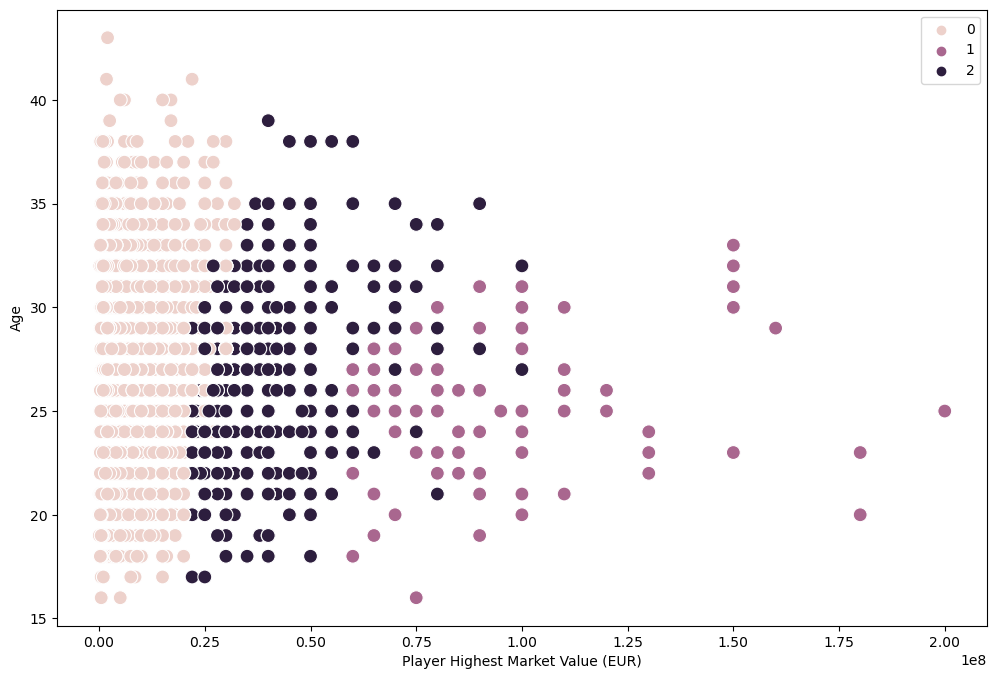

In [20]:
# Plot the clusters for the 'Player Highest Market Value (EUR)' and 'Player Age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=big5_df['highest_market_value_in_eur'], y=df['age'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Player Highest Market Value (EUR)')
plt.ylabel('Age')
plt.show()

In [21]:
big5_df.groupby('clusters').agg({'age':['mean', 'median'], 
                         'market_value_in_eur':['mean', 'median'], 
                         'highest_market_value_in_eur':['mean', 'median'],})

age         market_value_in_eur                \
            mean  median                mean        median   
clusters                                                     
0        26.3787 26.0000        5286416.5764  3500000.0000   
1        25.2900 25.0000       72340000.0000 70000000.0000   
2        26.4536 26.0000       24638969.0722 25000000.0000   

         highest_market_value_in_eur                
                                mean        median  
clusters                                            
0                       9042416.0347  7500000.0000  
1                      90850000.0000 85000000.0000  
2                      40509278.3505 38000000.0000

Age doesn't have any major impact on market value. The above summary shows the different phases of a player's market value throughout their career. 
Cluster 0 holds players in the early and end phases of their careers in Market Value (early phase = upward movement of the market value; & end phase = the downward movement of their market value as their career ends) the average of 26 is an indication  that these two age phases are present within the cluster 0. from age 30 player market value start to decrease at an increased rate.
Cluster 1 holds players within the growth part of their journey as well as some peak market value points for some players.
Cluster 3 holds the 'cream of the crop' players within the climax of their careers.

Age has proved to not be very influencial in predicting player Market Value. The next analysis phase would be to use catagorical data (position, foot, club history, etc) to test their influence on a players market value.